In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
file1 = "mouse_drug_data.csv"
file2= "clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = pd.read_csv(file1)
trialdata = pd.read_csv(file2)

# Combine the data into a single dataset
clinical_trial = trialdata.merge(mousedata, on="Mouse ID")

#pull only the data we need
clinical_trial = clinical_trial[(clinical_trial["Drug"] == 'Capomulin') |
                      (clinical_trial["Drug"] == 'Infubinol') |
                      (clinical_trial["Drug"] == 'Ketapril') |
                      (clinical_trial["Drug"] == 'Placebo')]

# Display the data table for preview
clinical_trial.head()
#inspect data
#clinical_trial["Mouse ID"].unique()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_volume = pd.DataFrame(clinical_trial.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])

# Preview DataFrame
mean_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_volume = pd.DataFrame(clinical_trial.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])


# Preview DataFrame
sem_volume.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
mean_volume = mean_volume.unstack(level = 0)
mean_volume.columns = mean_volume.columns.get_level_values(level = 1)

mean_volume

# Preview that Reformatting worked


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [9]:
sem_volume = sem_volume.unstack(level = 0)
sem_volume.columns = sem_volume.columns.get_level_values(1)

sem_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


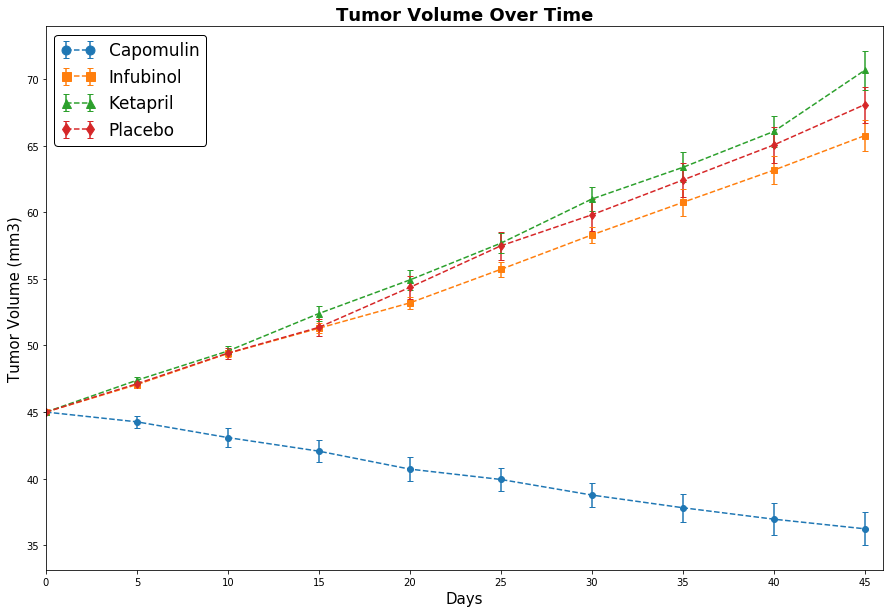

In [19]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, mean_volume.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, mean_volume.index.max() + 1) 

#markers used throughout 
markers = ['o', 's', '^', 'd']

# independent variable
xvals = mean_volume.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for c in mean_volume.columns:
    plt.errorbar(xvals, 
                 mean_volume[c], 
                 sem_volume[c], #std error
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1

#legend options
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()
# Save the Figure



## Metastatic Response to Treatment

In [23]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
spread_average = pd.DataFrame(clinical_trial.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])

# Preview DataFrame
spread_average.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [24]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error = pd.DataFrame(clinical_trial.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

# Preview DataFrame
standard_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [25]:
# Minor Data Munging to Re-Format the Data Frames
spread_average = spread_average.unstack(level = 0)
spread_average.columns = spread_average.columns.get_level_values(level = 1)

# Preview that Reformatting worked
spread_average


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [26]:
# Minor Data Munging to Re-Format the Data Frames
standard_error = standard_error.unstack(level = 0)
standard_error.columns = standard_error.columns.get_level_values(level = 1)

# Preview that Reformatting worked
standard_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


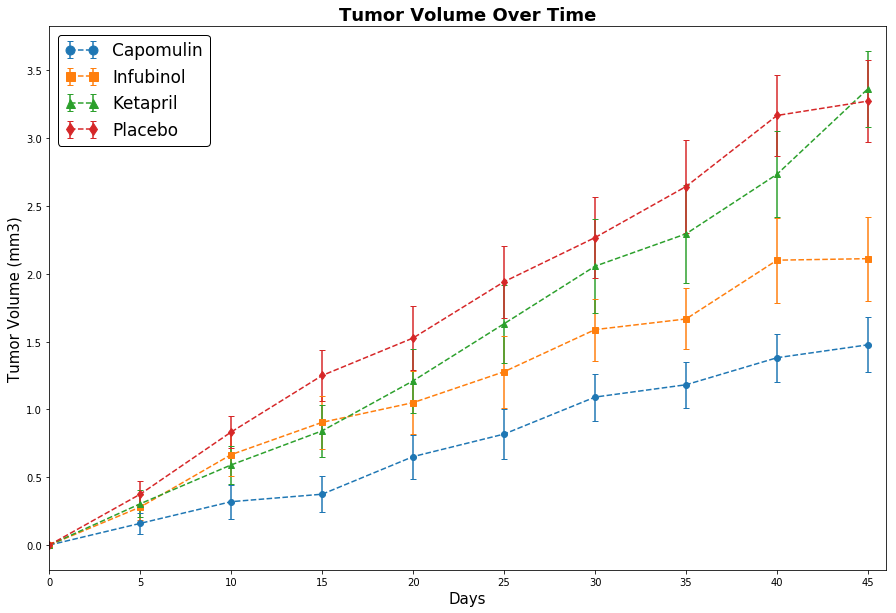

In [27]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title('Tumor Volume Over Time', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Tumor Volume (mm3)', fontdict = {'fontsize': 15})
plt.xticks(np.arange(0, spread_average.index.max()+3 , 5)) # location of separators for timepoint
plt.xlim(0, spread_average.index.max() + 1) 

#markers used throughout 
markers = ['o', 's', '^', 'd']

# independent variable
xvals = spread_average.index #timepoints

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for c in spread_average.columns:
    plt.errorbar(xvals, 
                 spread_average[c], 
                 standard_error[c], #std error
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1

#legend options
lg = plt.legend(numpoints = 2, # gives two symbols in legend
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)


# Show the Figure
plt.show()




## Survival Rates

In [38]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = pd.DataFrame(clinical_trial.groupby(['Drug','Timepoint']).count()['Mouse ID'])

# Preview DataFrame
mice.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [39]:
# Minor Data Munging to Re-Format the Data Frames
mice = mice.unstack(level = 0)
mice.columns = mice.columns.get_level_values(level = 1)

# Preview that Reformatting worked
mice

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


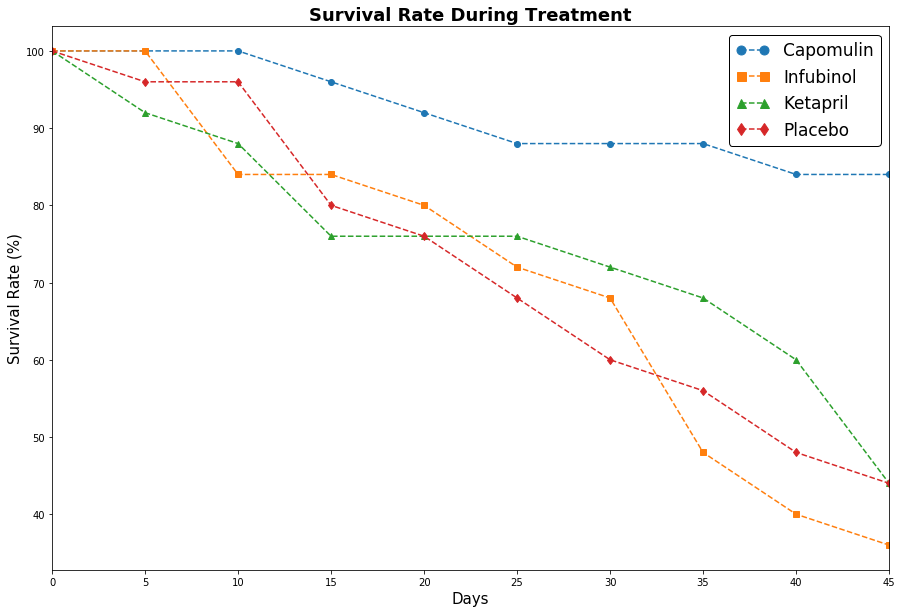

In [42]:
#plot options
plt.figure(figsize = (15,10))
plt.title('Survival Rate During Treatment', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('Days', fontdict = {'fontsize': 15})
plt.ylabel('Survival Rate (%)', fontdict = {'fontsize': 15})
plt.xlim(0, mice.index.max())


xvals = mice.index #timepoints

count = 0 

for c in mice:
    yvals = mice[c]/mice.loc[0,c] * 100 #calculates survival rate for each timepoint
    plt.plot(xvals, 
             yvals, 
             linestyle = '--', 
             marker =  markers[count], #markers list from above
             )
    count += 1
    
#legend options
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'black', 
                fontsize = '17', 
                framealpha = 1)

plt.show()
   

## Summary Bar Graph

In [72]:
# Calculate the percent changes for each drug
tumor_growth = (mean_volume.loc[45, :] - mean_volume.loc[0, :])/mean_volume.loc[0, :] * 100


# Display the data to confirm

tumor_growth.head()


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

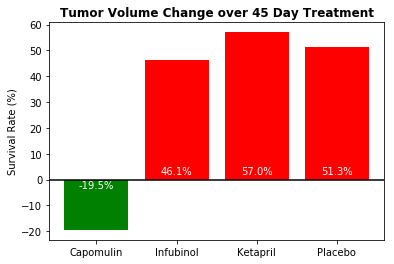

In [75]:
#plot options
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
xlabels = tumor_growth.index
#puts drug names as labels
plt.xticks(np.arange(len(xlabels)), xlabels)

#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        tumor_growth, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_growth[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_growth:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
plt.show()

In [70]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().